In [3]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from sklearn import preprocessing

In [4]:
data=pd.read_excel("/home/het/Desktop/NIFTY-1997.xlsx")
#data["Date/Time"][4500:]

In [227]:
# regime_hmm_train.py

from __future__ import print_function

import datetime
import pickle
import warnings

from hmmlearn.hmm import GaussianHMM,GMMHMM, MultinomialHMM
from matplotlib import cm, pyplot as plt
from matplotlib.dates import YearLocator, MonthLocator
import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib
matplotlib.rc('figure', figsize=(20, 20))

# Using the close value as observation paramater for HMM

In [119]:
def plot_in_sample_hidden_states(hmm_model, df, rets):
    """
    Plot the adjusted closing prices masked by
    the in-sample hidden states as a mechanism
    to understand the market regimes.
    """
    # Predict the hidden states array
    hidden_states = hmm_model.predict(rets)
    #print(len(hidden_states))
    # Create the correctly formatted plot
    fig, axs = plt.subplots(
        hmm_model.n_components,
        sharex=True, sharey=True, figsize=(20,20)
    )
    colours = cm.rainbow(
        np.linspace(0, 1, hmm_model.n_components)
    )
    for i, (ax, colour) in enumerate(zip(axs, colours)):
        mask = hidden_states == i
        print(i)
        print(mask)
        ax.plot_date(
            df.index[mask],
            df["Close"][mask],
            ".", linestyle='none',
            c=colour
        )
        ax.set_title("Hidden State #%s" % i)
        ax.xaxis.set_major_locator(YearLocator())
        ax.xaxis.set_minor_locator(MonthLocator())
        ax.grid(True)
    plt.show()

In [107]:
def main_model(hidden_layers, data, col):

    # Hides deprecation warnings for sklearn
    warnings.filterwarnings("ignore")

    # Create the SPY dataframe from the Yahoo Finance CSV
    # and correctly format the returns for use in the HMM
    #filepath = "/home/het/Desktop/NIFTY-1997.xlsx"
    pickle_path = "/home/het/Desktop/hmm_model_spy.pkl"
    end_date = datetime.datetime(2019,5,9)
    rets = np.column_stack([data[col]])

    # Create the Gaussian Hidden markov Model and fit it
    # to the SPY returns data, outputting a score
    hmm_model = GaussianHMM(n_components=hidden_layers, covariance_type="full", n_iter=1000
    ).fit(rets)
    #print("Model Score:", hmm_model.score(rets))
    
    # Predict the hidden states array
    hidden_states = hmm_model.predict(rets)
    
    # Plot the in sample hidden states closing values
    plot_in_sample_hidden_states(hmm_model, data, rets)

    #print("Pickling HMM model...")
    pickle.dump(hmm_model, open(pickle_path, "wb"))
    #print("...HMM model pickled.")
    return hidden_states

In [6]:
df = pd.read_excel("/home/het/Desktop/NIFTY-1997.xlsx", header=0, index_col="Date/Time")

In [7]:
df["Returns"] = df["Close"].pct_change()

training_data=df[:4500]                                
testing_data= df[4500:]

training_data.dropna(inplace=True)
testing_data.dropna(inplace=True)

/home/het/.local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/het/.local/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


0
[ True  True  True ...  True  True  True]
1
[False False False ... False False False]


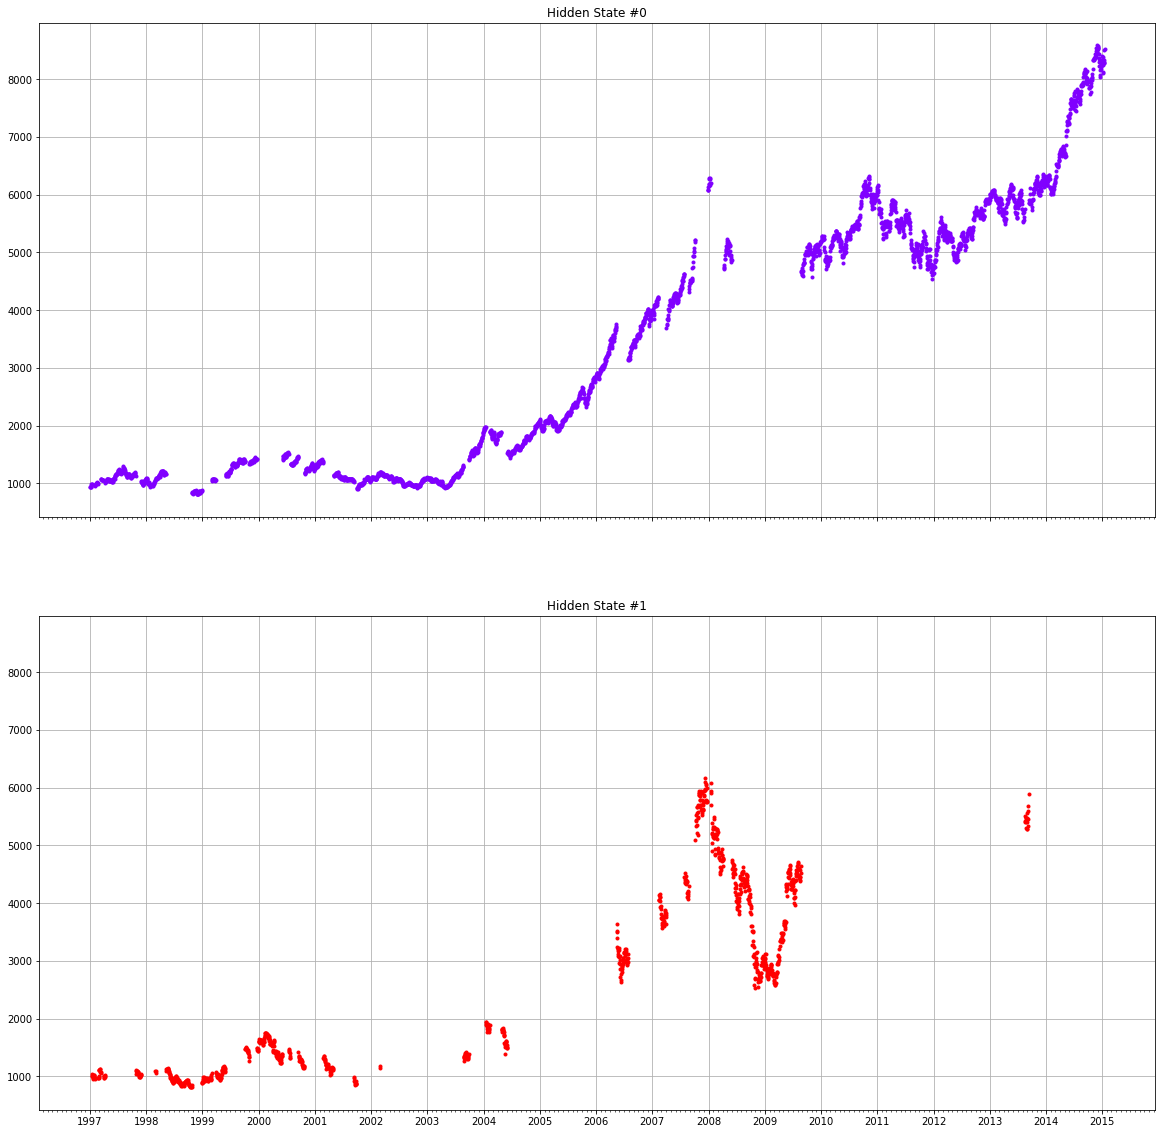

0
[False False False ... False False False]
1
[ True  True  True ...  True  True  True]


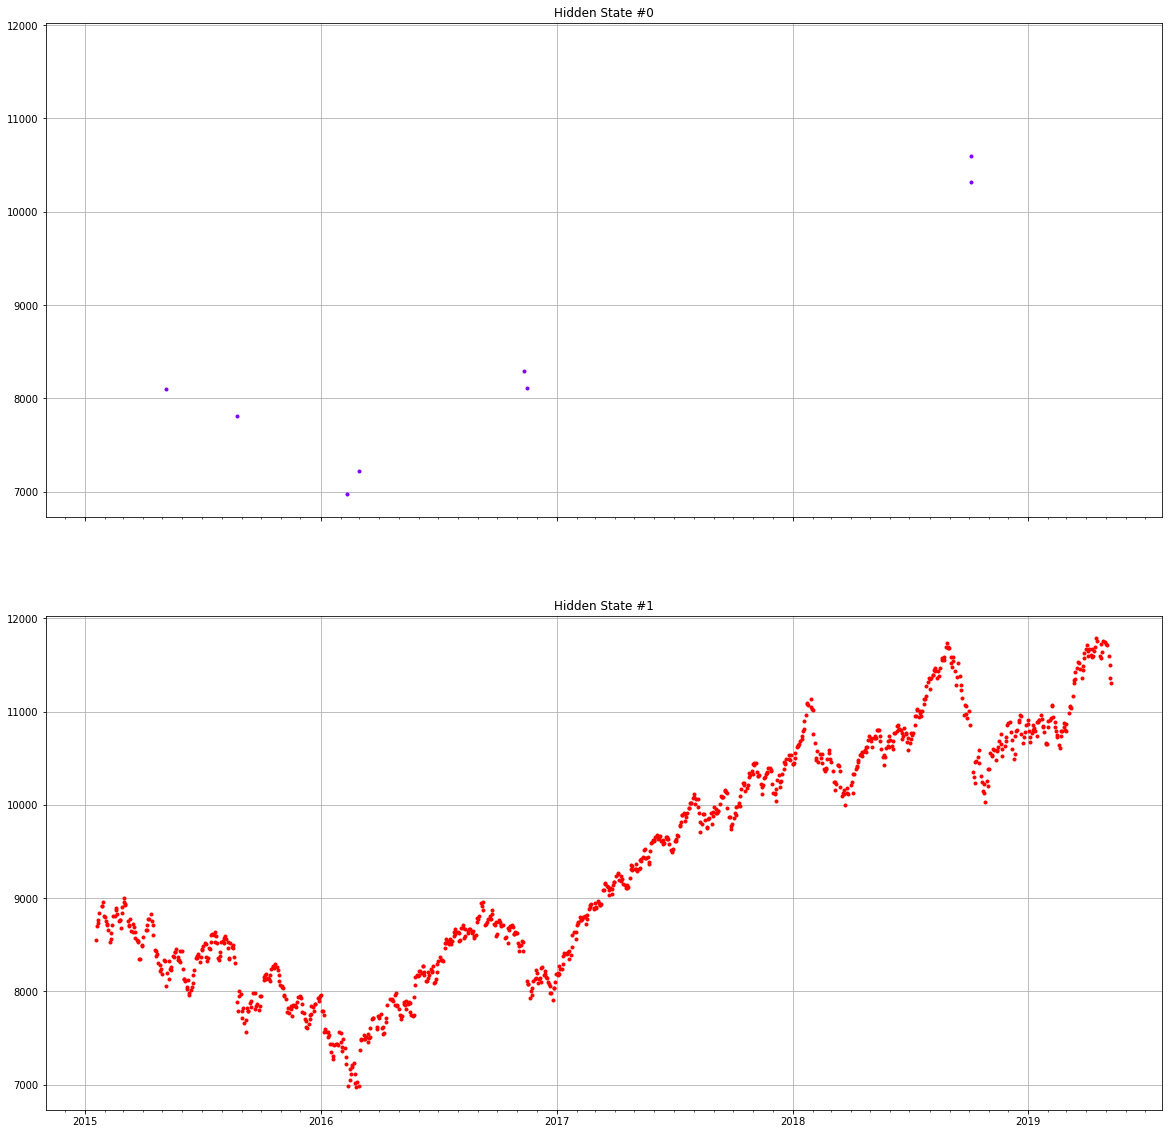

In [120]:
hs_train=main_model(2, training_data,"Returns")
hs_test=main_model(2, testing_data,"Returns")

In [37]:
count_train_state_changes=0
for i in range(1,len(hs_train)):
    if(hs_train[i-1]!=hs_train[i]):
        count_train_state_changes+=1
count_train_state_changes

46

In [38]:
count_test_state_changes=0
for i in range(1,len(hs_test)):
    if(hs_test[i-1]!=hs_test[i]):
        count_test_state_changes+=1
count_test_state_changes

12

# Using Volatility as observation parameter for HMM

In [42]:
#Finding standard Deviation

def find_std(data):
    std_arr=[]
    for i in range(10):
        std_arr.append(0);
    for i in range(10,data.shape[0]):
        last10=data["Returns"][i-10:i]
        std_arr.append(last10.std())
    #print(std_arr)
    data["Mov_std"]=std_arr

In [43]:
find_std(training_data)
find_std(testing_data)

Model Score: 12752.562215218433


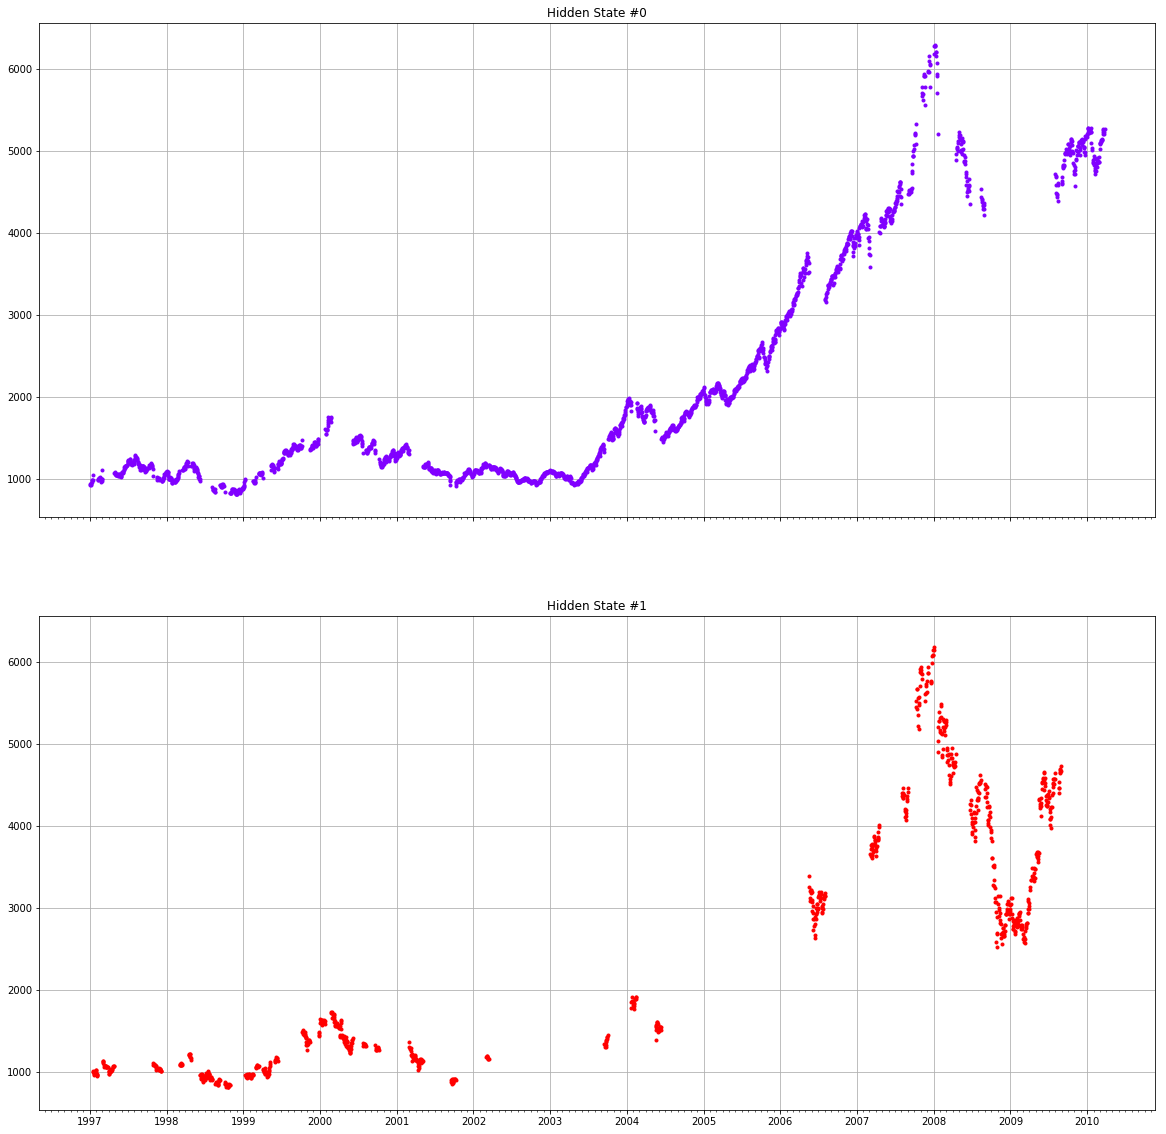

Pickling HMM model...
...HMM model pickled.
Model Score: 10016.757465966868


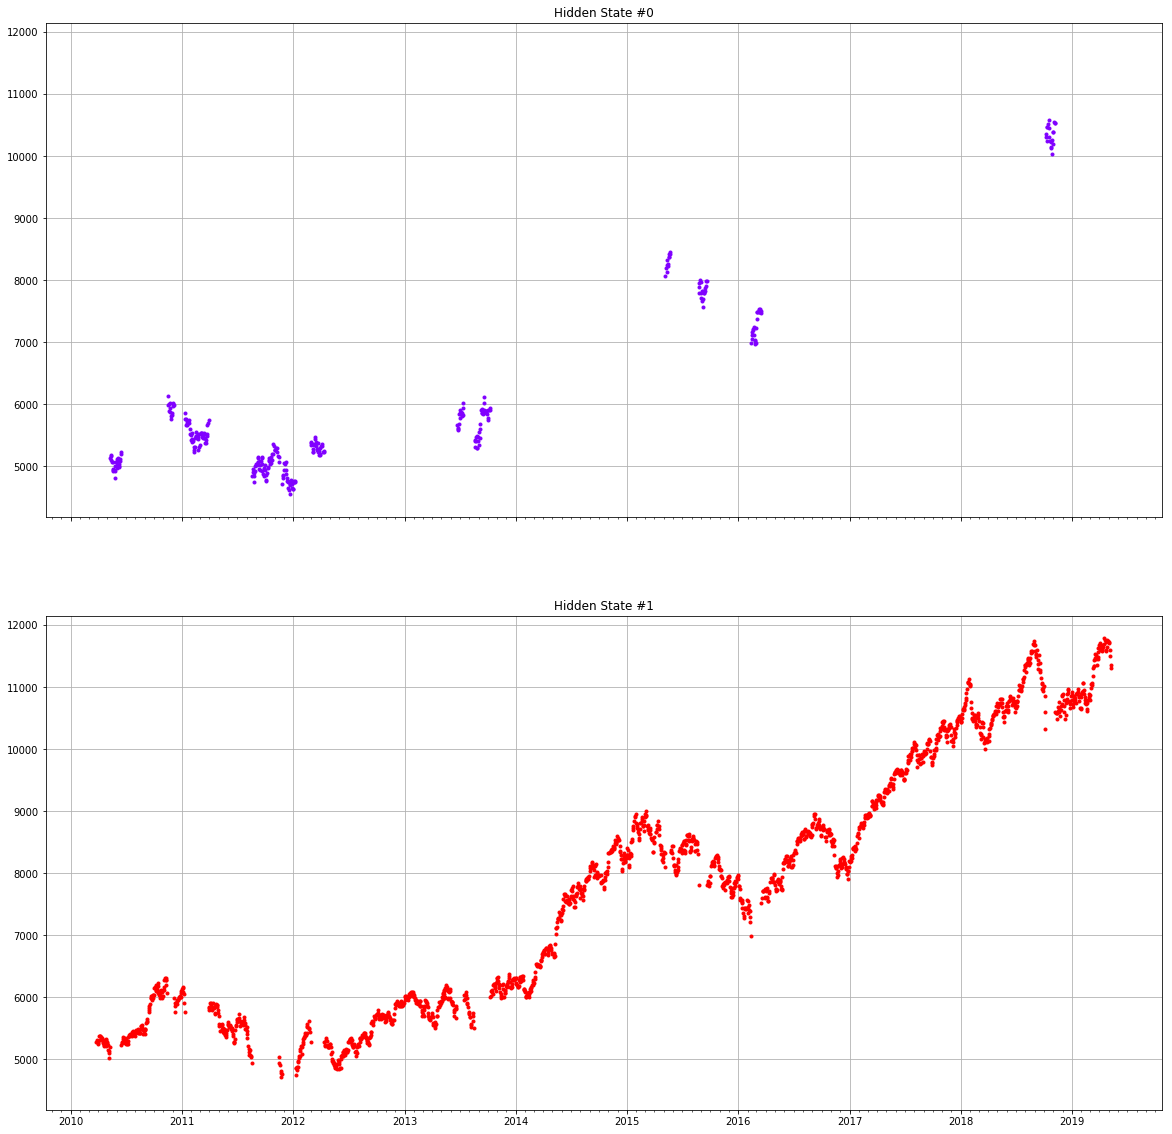

Pickling HMM model...
...HMM model pickled.


In [44]:
hs_train_sd=main_model(2, training_data,"Mov_std")
hs_test_sd=main_model(2, testing_data,"Mov_std")

In [235]:
count_train_state_changes=0
for i in range(1,len(hs_train_sd)):
    if(hs_train_sd[i-1]!=hs_train_sd[i]):
        count_train_state_changes+=1
count_train_state_changes

68

In [236]:
count_test_state_changes=0
for i in range(1,len(hs_test)):
    if(hs_test_sd[i-1]!=hs_test_sd[i]):
        count_test_state_changes+=1
count_test_state_changes

24

In [307]:
training_data

,Ticker,Open,High,Low,Close,Volume,Returns,Mov_std
Date/Time,,,,,,,,
1997-01-02,Nifty 50,941.95,944.00,925.05,927.05,49118380,-0.013304,0.000000
1997-01-03,Nifty 50,924.30,932.60,919.55,931.65,35263844,0.004962,0.000000
1997-01-06,Nifty 50,932.45,937.95,925.65,927.80,26323660,-0.004132,0.000000
1997-01-07,Nifty 50,926.35,935.15,922.25,928.80,44473416,0.001078,0.000000
1997-01-08,Nifty 50,937.35,953.10,937.35,946.70,49517340,0.019272,0.000000
1997-01-09,Nifty 50,945.15,959.75,943.60,956.60,39566904,0.010457,0.000000
1997-01-10,Nifty 50,962.70,984.10,962.70,980.35,52001500,0.024828,0.000000
1997-01-13,Nifty 50,978.55,982.25,965.50,980.70,40185284,0.000357,0.000000
1997-01-14,Nifty 50,984.00,994.40,977.70,989.30,49911224,0.008769,0.000000


# Training the model on 5 years data

In [208]:
df = pd.read_excel("/home/het/Desktop/NIFTY-1997.xlsx", header=0)
df["Returns"] = df["Close"].pct_change()
df=df.dropna()
df

,Ticker,Date/Time,Open,High,Low,Close,Volume,Returns
1,Nifty 50,1997-01-02,941.95,944.00,925.05,927.05,49118380,-0.013304
2,Nifty 50,1997-01-03,924.30,932.60,919.55,931.65,35263844,0.004962
3,Nifty 50,1997-01-06,932.45,937.95,925.65,927.80,26323660,-0.004132
4,Nifty 50,1997-01-07,926.35,935.15,922.25,928.80,44473416,0.001078
5,Nifty 50,1997-01-08,937.35,953.10,937.35,946.70,49517340,0.019272
6,Nifty 50,1997-01-09,945.15,959.75,943.60,956.60,39566904,0.010457
7,Nifty 50,1997-01-10,962.70,984.10,962.70,980.35,52001500,0.024828
8,Nifty 50,1997-01-13,978.55,982.25,965.50,980.70,40185284,0.000357
9,Nifty 50,1997-01-14,984.00,994.40,977.70,989.30,49911224,0.008769
10,Nifty 50,1997-01-15,997.50,1042.75,997.05,1041.80,53368616,0.053068


In [235]:
import warnings
warnings.filterwarnings('ignore')

start=1
end=1305
two_list=[10 for i in range(0,1305)]
final_predictions=[]
final_predictions.append(two_list)
for i in range(20):
    train=df[start:end]
    test=df[end:(end+261)]
    train1 = np.column_stack([train["Returns"]])
    test1 =  np.column_stack([test["Returns"]])
    hmm_model = GaussianHMM(n_components=2, covariance_type="full", n_iter=10000
    ).fit(train1)
    predictions=hmm_model._compute_log_likelihood(test1)
    print(np.exp(predictions))
    final_predictions.append((list(map(lambda x: list(x).index(max(x)) if np.exp(max(x))>20 else 10,predictions))))
    start=start+261
    end=end+261
merged_list = []
#list(x).index(max(x)) if np.exp(max(x))>20 else 10,
for l in final_predictions:
    merged_list += l
df["HMM_predictions"]=merged_list

[[12.27913775 28.33845867]
 [11.92031557 26.90143381]
 [11.60706779 24.71291626]
 [12.33304361 27.85600218]
 [11.89090681 18.79144037]
 [ 9.59358868 11.38338843]
 [12.34113183 27.02638115]
 [12.29403965 25.23889904]
 [12.22193854 23.66846865]
 [11.3143852  22.53910611]
 [12.01565698 27.48263652]
 [12.162163   28.18682612]
 [11.99119948 20.06270232]
 [11.69947729 16.65654867]
 [11.90493562 26.8021493 ]
 [12.09726262 27.91395789]
 [ 9.70462745  4.89920496]
 [12.09480684 27.90219927]
 [12.21347116 28.33090287]
 [12.04268567 27.63383063]
 [11.5635     15.31981986]
 [12.14250295 28.11281238]
 [10.54501723  8.27446906]
 [11.43996056 23.47520065]
 [11.63297945 24.9025963 ]
 [12.10675322 27.95854355]
 [12.08358324 27.84735611]
 [11.53846978 24.20719158]
 [11.85036194 26.44039293]
 [11.52640867 24.11785294]
 [12.06216889 21.04719324]
 [12.13715587 28.09125035]
 [12.33567818 26.63400321]
 [12.26848419 24.62726516]
 [11.70398048 16.70312855]
 [12.33590116 27.77286464]
 [11.52847868 14.99581246]
 

[[1.50223568e+01 3.29756243e+01]
 [5.39539817e+00 1.02731108e-01]
 [1.51255638e+01 3.26366644e+01]
 [1.50935590e+01 2.96889051e+01]
 [1.48573427e+01 2.58157161e+01]
 [1.30270485e+01 1.12643939e+01]
 [1.23482531e+01 1.75608562e+01]
 [1.38251914e+01 2.64911763e+01]
 [1.30053917e+01 2.13343665e+01]
 [1.32664753e+01 1.25285112e+01]
 [1.20891164e+01 7.35823408e+00]
 [5.50387857e+00 1.13818353e-01]
 [1.43362012e+01 2.97484943e+01]
 [1.48071931e+01 3.23478782e+01]
 [2.16277526e-01 1.03681319e-08]
 [4.31077624e-04 6.27025307e-22]
 [8.42739197e-02 4.36445435e-09]
 [3.65959773e+00 1.01963336e-01]
 [1.33079795e+01 1.27608798e+01]
 [1.35389874e+01 2.46529930e+01]
 [6.88220856e+00 1.58025525e+00]
 [1.51470972e+01 3.21684647e+01]
 [1.50512853e+01 2.88223276e+01]
 [1.47802290e+01 2.48236145e+01]
 [3.07016811e+00 5.78591580e-03]
 [1.29447252e+01 1.08580983e+01]
 [1.19072814e+01 1.52618985e+01]
 [1.13534030e+01 1.26556986e+01]
 [9.92377902e+00 2.49713902e+00]
 [1.15855856e+01 1.37098066e+01]
 [1.259679

[[3.06598141e+01 1.42179524e+01]
 [2.36326926e+01 1.40819920e+01]
 [3.58471495e+01 1.40357032e+01]
 [3.63005944e+01 1.38208688e+01]
 [1.98527296e+01 1.39195205e+01]
 [2.01613239e+01 1.15181400e+01]
 [3.59487716e+01 1.40190328e+01]
 [2.82889793e+01 1.41984487e+01]
 [1.56078236e+01 1.08683528e+01]
 [3.09379789e+01 1.28719764e+01]
 [3.54055950e+01 1.35392311e+01]
 [3.20051014e+01 1.42127435e+01]
 [3.63171101e+01 1.38868425e+01]
 [3.37078913e+01 1.32498356e+01]
 [2.96404099e+01 1.42134773e+01]
 [3.55323263e+01 1.35661476e+01]
 [3.04078300e+01 1.28044738e+01]
 [3.50084152e+01 1.41194688e+01]
 [2.74414785e+01 1.24369369e+01]
 [3.59737330e+01 1.40144877e+01]
 [3.48541236e+01 1.41295073e+01]
 [3.25161814e+01 1.30801785e+01]
 [3.13645729e+01 1.29270244e+01]
 [3.28159972e+01 1.42017764e+01]
 [3.09441817e+01 1.42179981e+01]
 [2.09557089e+01 1.16234390e+01]
 [2.15835877e+01 1.17054180e+01]
 [3.63143584e+01 1.38912763e+01]
 [3.22715138e+01 1.42098916e+01]
 [3.60672430e+01 1.39953141e+01]
 [2.005138

[[30.2836771  13.35097946]
 [29.64540171 14.04616681]
 [24.81728129 13.81146778]
 [34.52139656 14.16015759]
 [33.09227219 13.65118542]
 [26.94783086 13.92591186]
 [34.52113003 14.16015922]
 [24.28553994 12.71988605]
 [25.91823437 12.89570563]
 [33.62029604 14.1567631 ]
 [35.75308973 14.05993438]
 [25.60362138 13.85565582]
 [24.01048768 13.76373887]
 [35.69401794 14.02630975]
 [14.79159052 13.01247606]
 [35.62789891 14.11398718]
 [32.8405194  14.14427923]
 [22.64608417 12.5376564 ]
 [35.73005888 14.04189327]
 [34.11273156 14.1605565 ]
 [13.43492464 11.32095078]
 [34.75482018 13.85406547]
 [35.43188965 14.13408904]
 [33.99059005 13.75570596]
 [ 8.29118347 10.34821654]
 [33.55147163 13.70362314]
 [25.65236558 12.86739529]
 [28.18889643 13.98479204]
 [28.59581137 13.17604805]
 [16.20673769 11.73413332]
 [34.80473386 13.8610332 ]
 [32.08179067 14.12670934]
 [28.62575788 14.00410651]
 [28.23743381 13.13887672]
 [35.68704919 14.02381392]
 [34.30540948 14.16085288]
 [26.699814   13.91345123]
 

[[34.71799932 13.88273089]
 [33.19851859 13.75776044]
 [34.54999741 13.8790093 ]
 [26.19817048 13.21082212]
 [11.51833482 11.5334377 ]
 [28.03167291 13.46751125]
 [ 5.41886987 10.43510156]
 [34.65915215 13.87270163]
 [34.69167476 13.87631404]
 [33.16346512 13.80526279]
 [18.21872057 12.60737138]
 [34.21936728 13.86360419]
 [19.7360534  12.76407429]
 [33.95936711 13.85003196]
 [32.52500212 13.70765224]
 [28.24993312 13.37972717]
 [ 4.32570077 10.07276231]
 [34.07104284 13.85595655]
 [34.66950722 13.87379609]
 [32.44995138 13.70206977]
 [33.87647152 13.80871706]
 [33.19968023 13.75784704]
 [28.19749671 13.375522  ]
 [ 8.40763624 11.17792398]
 [31.97378189 13.73335409]
 [28.36827474 13.49173791]
 [34.59257513 13.88063965]
 [34.49214742 13.87658997]
 [22.96440824 12.92316616]
 [29.78677054 13.50069518]
 [31.85012893 13.65735588]
 [27.57471065 13.32515066]
 [23.09907807 12.93575331]
 [23.27063299 12.95170489]
 [31.56989079 13.6363752 ]
 [22.27544797 13.00405127]
 [ 5.88184098 10.57004464]
 

[[19.35634738 25.03326289]
 [22.00296475 39.01565089]
 [17.07146813 14.85379318]
 [21.75209403 38.19409415]
 [22.53000551 43.17761479]
 [21.6044447  36.34679827]
 [13.75236019  7.14833596]
 [22.52614782 43.15371839]
 [18.42773234 19.83160142]
 [21.35521165 35.7541969 ]
 [21.69877686 36.96361043]
 [22.0917143  39.63404205]
 [22.46429553 42.35774495]
 [21.85873546 38.03023907]
 [22.28949987 41.04975697]
 [22.31007699 41.20046704]
 [18.95799063 22.08158838]
 [22.59971149 43.57981202]
 [19.26698947 23.47793459]
 [15.38865466 10.80624962]
 [22.61091127 43.59983636]
 [20.25376313 29.52183369]
 [19.33822205 24.94791016]
 [22.57117004 43.21106189]
 [22.55138109 43.30840226]
 [22.60218963 43.48963573]
 [19.32185506 24.87101471]
 [22.06436935 39.44248061]
 [22.55718035 43.09410335]
 [21.29785921 35.40988042]
 [18.72966585 22.20030712]
 [22.3094992  41.76407421]
 [22.56766897 43.18151325]
 [22.55828876 43.34990435]
 [22.46081941 42.33097935]
 [22.46827673 42.7888343 ]
 [22.48388106 42.88812136]
 

[]
[]
[]


""


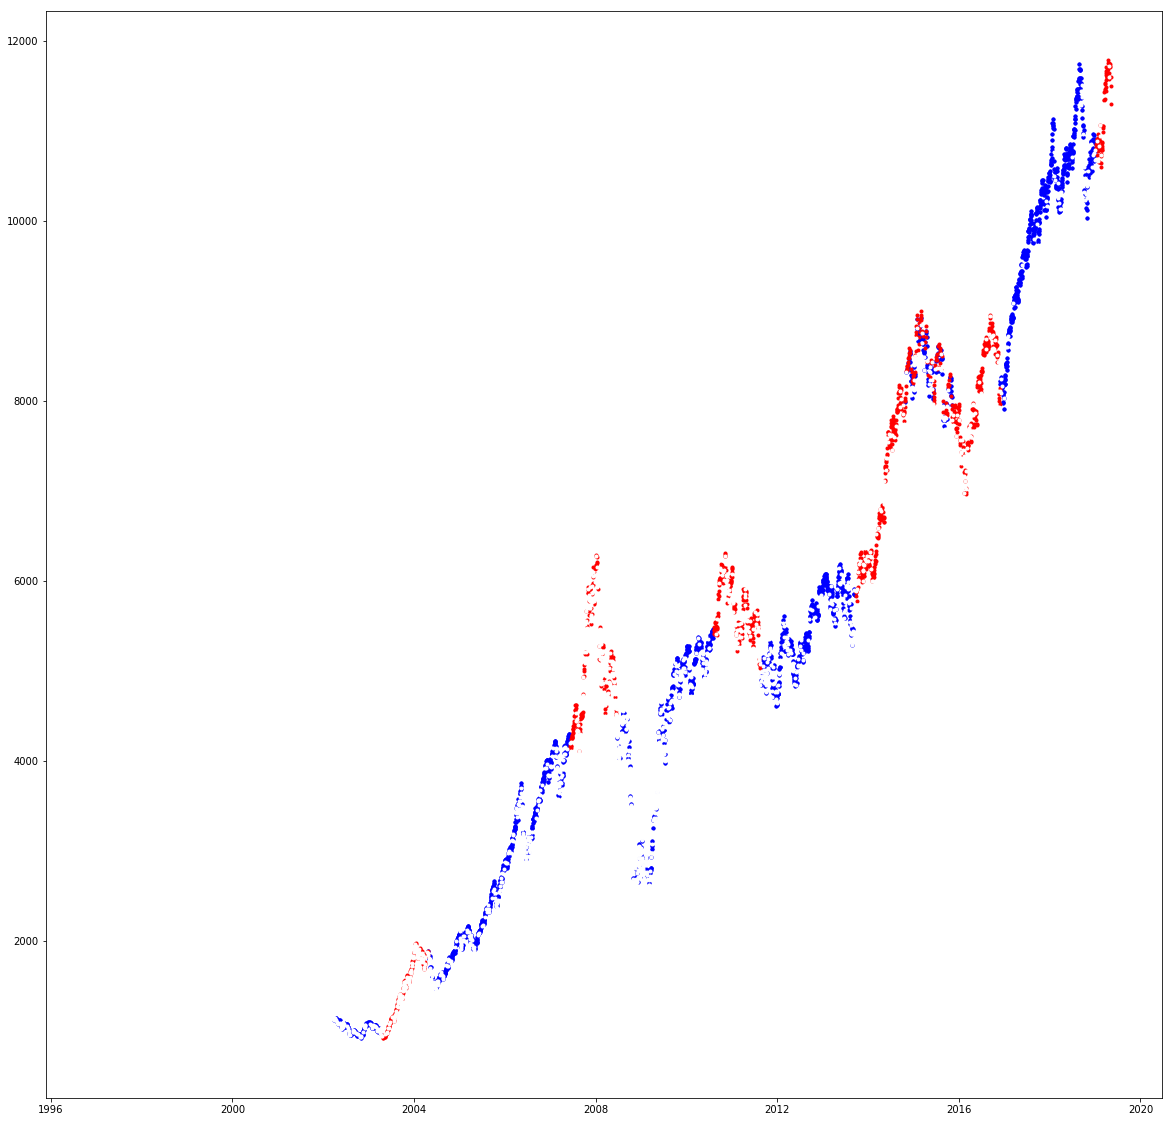

In [232]:

fig, ax = plt.subplots()

def plot_func(group):
    color="y"
    #print(group)
    global ax
    if (group['HMM_predictions'] == 1).all():
        color = 'r'
    elif(group['HMM_predictions'] == 0).all():
        color="b"
    elif(group['HMM_predictions'] == 2).all():
        color="y"
    else: 
        color='w'
    lw = 2.0
    ax.plot(group["Date/Time"], group.Close, ".", c=color)
 
df.groupby((df["HMM_predictions"])).apply(plot_func)

#print(df)

In [1]:
import pandas.stats

ModuleNotFoundError: No module named 'pandas.stats'